In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


In [2]:
# Load the dataset
file_path = "C:/Users/hp/OneDrive/Desktop/aapl_dataset.csv"  # Replace with your actual file

df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")
df = df.rename({'close_aapl': 'Close'},axis = 1)

In [3]:
df = df['Close']

In [4]:
df.head()

Date
1980-12-12    0.098726
1980-12-15    0.093575
1980-12-16    0.086707
1980-12-17    0.088853
1980-12-18    0.091429
Name: Close, dtype: float64

In [5]:
# Train-Test Split
train_size = int(len(df) * 0.95)
train, test = df[:train_size], df[train_size:]

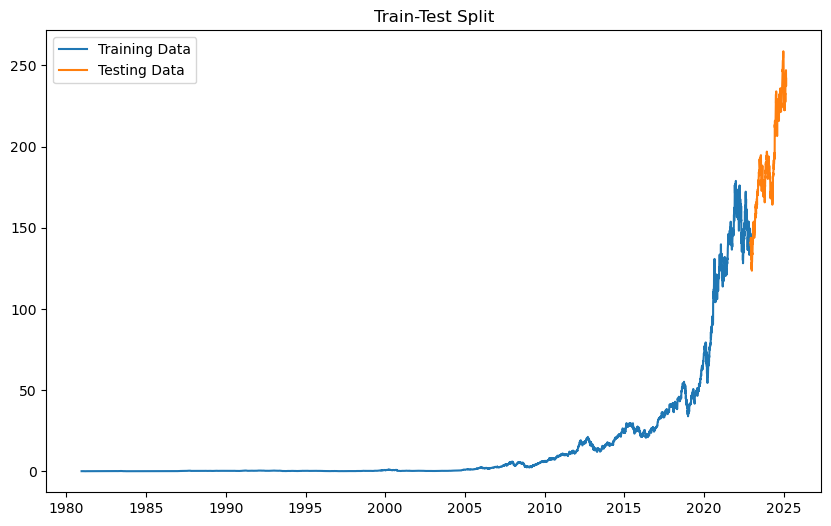

In [6]:
# Plot the data to visualize
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.legend()
plt.title('Train-Test Split')
plt.show()

In [15]:
# Set ARIMA order (tune based on ACF/PACF)
p, d, q = 5, 1, 0  # Adjust based on ACF/PACF


In [17]:
# **Step-by-Step Forecasting (Avoid Data Leakage)**
history = train.tolist()  # Convert to list to update dynamically
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps = 1)[0]  # Predict one step ahead
    predictions.append(forecast)
    history.append(test.iloc[t])  # Append actual value for next prediction


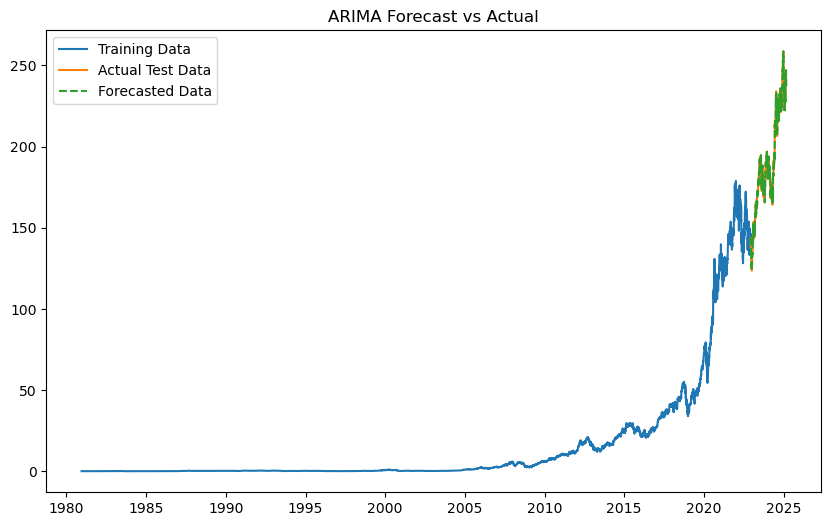

In [19]:
# Plot Actual vs Forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, predictions, label='Forecasted Data', linestyle="dashed")
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

In [21]:
# Evaluate Model
mse = mean_squared_error(test, predictions)
mape = mean_absolute_percentage_error(test, predictions)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

Mean Squared Error: 7.3609
Root Mean Squared Error: 2.7131


In [29]:

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define R-squared function
def r_squared(y_true, y_pred):
    mean_actual = np.mean(y_true)
    ss_total = np.sum((y_true - mean_actual) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Evaluate Model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test, predictions)
r2 = r_squared(test, predictions)

# Print Metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Percentage Error: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 7.3609
Root Mean Squared Error: 2.7131
Mean Absolute Percentage Error: 1.0629%
R-squared: 0.9924
